In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

###### Plot Zeugs

In [9]:
def new_plot(settings):
    if settings != None and settings != {}:
        

        if "figsize" in settings:
            figsize_multiplier = settings["figsize"]
        else:
            figsize_multiplier = 1

        if "axis" in settings and "subplots" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif "axis" in settings and not("subplots" in settings):
            fig, axs = plt.subplots( figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif not("axis" in settings) and "subplots" in settings and not("figsize" in settings):
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"])
        elif not("axis" in settings) and "subplots" in settings and "figsize" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=(figsize_multiplier,figsize_multiplier))    
        elif not("axis" in settings) and not("subplots" in settings) and "figsize" in settings:
            fig, axs = plt.subplots(figsize=(figsize_multiplier,figsize_multiplier))
        else:
            fig, axs = plt.subplots()
 
        if(np.size(axs) == 1):
            axs = [axs]

        for ax in axs:
        #Achsen Skala
            if "lock_axis" in settings and settings["lock_axis"] and "axis" in settings:
                ax.axis([settings["axis"]["x"][0],settings["axis"]["x"][1],settings["axis"]["y"][0],settings["axis"]["y"][1]])

            #Achsen Beschriftunge
            if "axis_label_steps" in settings and "axis" in settings:
                ax.set_xticks( np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["axis_label_steps"]["x"]))
                ax.set_yticks( np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["axis_label_steps"]["y"]))
            

            #Gitter
            if "grid" in settings:
                if "axis" in settings and "minor_steps" in settings["grid"]:
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["grid"]["minor_steps"]["x"]),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["grid"]["minor_steps"]["y"]),minor=True)

                elif "axis" in settings and not("minor_steps" in settings["grid"]):
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1),minor=True)
                    
                else:
                    ax.minorticks_on()

                ax.grid(which='minor', alpha=settings["grid"]["minor_alpha"])
                ax.grid(which='major', alpha=settings["grid"]["major_alpha"])

            #Achsen Verhältings
            if "aspect" in settings:
                ax.set_aspect(settings["aspect"])

        if(np.size(axs) == 1):
            axs = axs[0]

    else:
        fig, axs = plt.subplots()
    
    return fig, axs

In [10]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot
 
    if np.size(ax) > 1:
        for i in range(0, np.size(ax)):
            ax[i].plot(x[i], y[i], color[i])
    else:
        ax.plot(x, y, color)
    
    return fig, ax

# Aufgabe 

### Direkte Lösung

Text(0, 1, '$f(t)$')

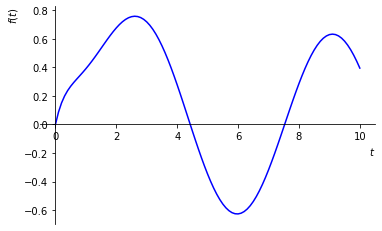

In [25]:

t0, t1 = 0.0, 10.0
h = 0.1
t = np.arange(t0,t1+h,h)

y = (np.sin(t)/5) - (3*np.cos(t)/5) + 2*np.exp(-t) - (7*np.exp(-2*t)/5)


fig, ax = draw_plot(t, y, 'b')

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$t$', loc='right')
ax.set_ylabel('$f(t)$', loc='top')

### Sybolische Lösung

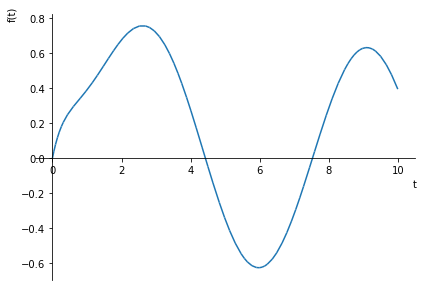

In [26]:
x0 = 0.0
xp0 = 1.0

t0, t1 = 0.0, 10.0


t =  Symbol('t')
x = Function('x')(t)

xp = Derivative(x)
xpp = Derivative(xp)

ode = Eq( xpp + 3*xp + 2*x , 2 * sin(t))

initconds = {x.subs(t, 0): x0, xp.subs(t, 0): xp0}


solf = dsolve(ode , ics=initconds)

#print(latex(solf))
plot (solf.rhs, (t, t0, t1))